# Plankton Profile of Shrimp ponds in Indramayu

In [1]:
# Intial set up

# Import required libraries for data wrangling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import shapiro # Normal test Shapiro
from scipy.stats import normaltest # Normal test D'Augustion Pearson
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [2]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# loading data
data_all = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQegAas0rx9dSPzpnqBEVUZQRZVhDIa07ijWx7m39_nSc64q7DI43iDSdz6I-cCbAHpuQ3bd6QOGnYt/pub?gid=0&single=true&output=csv')

# Displayin the first five rows of data
data_all.head(13)

,Minggu Ke-,Salinitas (ppt),Kecerahan,pH,Temperatur (°C),DO (mg/L),BOD (mg/L),TAN (mg/L),NH4 (mg/L),NO2 (mg/L),NO3 (mg/L),Total Alkali (mg/L),TOM (mg/L),PO4 (mg/L),Total Hardness (mg/L),ORP (mg/L),TVC (CFU/mL),TBC (CFU/mL),H' Fitoplankton,H' Zooplankton,D Fitoplankton,D Zooplankton
0,1,22.11,66.11,8.40,27.50,5.31,0.34,0.11,0.14,0.02,0.14,137,67.51,0.03,4533,186.00,13.33,1966.67,0.792,0.000,0.512,1.000
1,2,20.94,40.78,8.30,26.91,5.64,3.71,0.03,0.05,0.05,0.36,140,87.97,0.14,4133,198.00,70.00,6900.00,0.660,0.000,0.678,1.000
2,3,20.50,28.22,8.30,27.94,6.09,3.87,0.05,0.07,0.07,0.28,146,103.65,0.33,5267,210.67,116.67,4733.33,0.748,0.000,0.653,1.000
3,4,21.06,39.78,8.20,28.73,6.02,2.85,0.45,0.57,0.04,0.17,135,102.81,1.51,3883,210.00,616.67,10333.33,0.726,0.605,0.598,0.640
4,5,21.06,40.56,8.00,24.86,6.08,3.99,1.45,1.85,0.05,0.27,166,106.99,2.29,5824,173.00,2083.33,31433.33,0.777,0.932,0.510,0.431
5,6,22.94,34.22,8.20,26.88,6.08,3.28,2.46,3.15,0.05,0.30,151,111.71,2.72,6171,181.67,2033.33,21200.00,0.490,0.347,0.754,0.793
6,7,25.39,32.22,8.10,28.30,5.68,4.33,0.61,0.78,0.09,0.20,148,105.78,2.24,5400,159.67,1483.33,27900.00,0.690,0.784,0.674,0.526
7,8,27.44,30.67,8.40,27.14,5.40,3.41,0.16,0.20,0.04,0.19,132,106.60,1.22,6133,123.67,1330.00,18866.67,0.790,0.000,0.605,1.000
8,9,29.61,25.44,8.30,28.63,5.77,4.16,0.15,0.19,0.09,0.17,148,116.77,0.79,7800,206.33,830.00,11133.33,0.817,0.226,0.587,0.881
9,10,29.67,26.56,8.10,28.82,5.63,4.60,0.19,0.25,0.05,0.10,132,115.87,0.69,8147,167.67,2766.67,24400.00,0.652,0.376,0.690,0.789


In [3]:
# Summary of dataset
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Minggu Ke-             13 non-null     int64  
 1   Salinitas (ppt)        13 non-null     float64
 2   Kecerahan              13 non-null     float64
 3   pH                     13 non-null     float64
 4   Temperatur (°C)        13 non-null     float64
 5   DO (mg/L)              13 non-null     float64
 6   BOD (mg/L)             13 non-null     float64
 7   TAN (mg/L)             13 non-null     float64
 8   NH4 (mg/L)             13 non-null     float64
 9   NO2 (mg/L)             13 non-null     float64
 10  NO3 (mg/L)             13 non-null     float64
 11  Total Alkali (mg/L)    13 non-null     int64  
 12  TOM (mg/L)             13 non-null     float64
 13  PO4 (mg/L)             13 non-null     float64
 14  Total Hardness (mg/L)  13 non-null     int64  
 15  ORP (mg/

In [4]:
# Displaying the name of columns
data_all.columns

Index(['Minggu Ke-', 'Salinitas (ppt)', 'Kecerahan', 'pH', 'Temperatur (°C)',
       'DO (mg/L)', 'BOD (mg/L)', 'TAN (mg/L)', 'NH4 (mg/L)', 'NO2 (mg/L)',
       'NO3 (mg/L)', 'Total Alkali (mg/L)', 'TOM (mg/L)', 'PO4 (mg/L)',
       'Total Hardness (mg/L)', 'ORP (mg/L)', 'TVC (CFU/mL)', 'TBC (CFU/mL)',
       'H' Fitoplankton', 'H' Zooplankton', 'D Fitoplankton', 'D Zooplankton'],
      dtype='object')

In [5]:
# defining numerical and categorical columns

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64'] and var != 'Minggu Ke-']

# Identifying categorical colums that contains 'object'
categorical = [var for var in data_all.columns if data_all[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,[]
1,Numerical,"[Salinitas (ppt), Kecerahan, pH, Temperatur (°C), DO (mg/L), BOD (mg/L), TAN (mg/L), NH4 (mg/L), NO2 (mg/L), NO3 (mg/L), Total Alkali (mg/L), TOM (mg/L), PO4 (mg/L), Total Hardness (mg/L), ORP (mg/L), TVC (CFU/mL), TBC (CFU/mL), H' Fitoplankton, H' Zooplankton, D Fitoplankton, D Zooplankton]"


In [6]:
# Normal test, skewness and data distribution of numerical data

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64'] and var != 'Minggu Ke-']

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(data_all[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = data_all[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,Salinitas (ppt),9.322899,0.009453,Not Normally Distributed,-0.028369,Left Skew
1,Kecerahan,18.558610,0.000093,Not Normally Distributed,2.234547,Right Skew
2,pH,0.755120,0.685532,Normally Distributed,-0.490984,Left Skew
3,Temperatur (°C),2.347747,0.309167,Normally Distributed,-0.659337,Left Skew
4,DO (mg/L),0.406030,0.816266,Normally Distributed,-0.164409,Left Skew
5,BOD (mg/L),21.598552,0.000020,Not Normally Distributed,-2.445785,Left Skew
6,TAN (mg/L),18.422112,0.000100,Not Normally Distributed,2.338867,Right Skew
7,NH4 (mg/L),18.565932,0.000093,Not Normally Distributed,2.349345,Right Skew
8,NO2 (mg/L),1.052287,0.590879,Normally Distributed,0.352122,Right Skew
9,NO3 (mg/L),0.589462,0.744732,Normally Distributed,0.224913,Right Skew


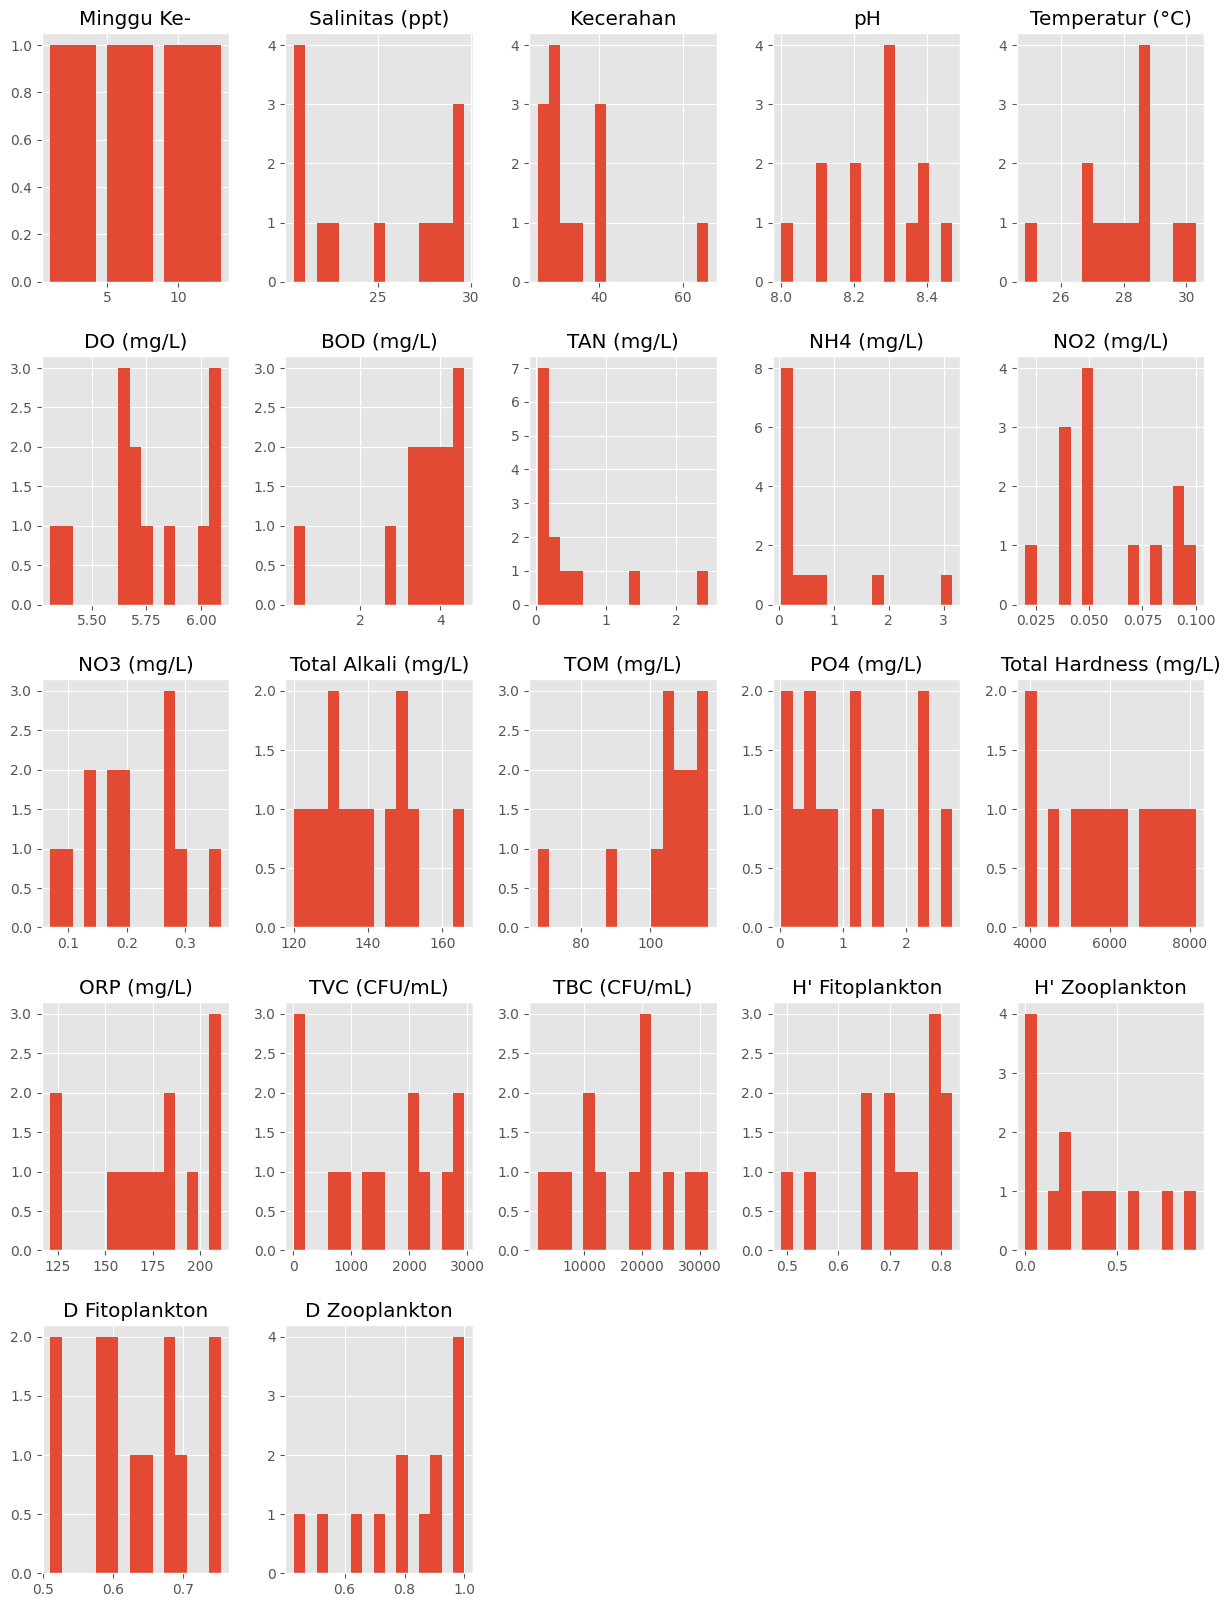

In [7]:
# ploting the histogram of numerical columns
# Checking data distribution of numerical columns via visual observation
data_all.hist(bins=15, figsize=(15,20))
plt.show()

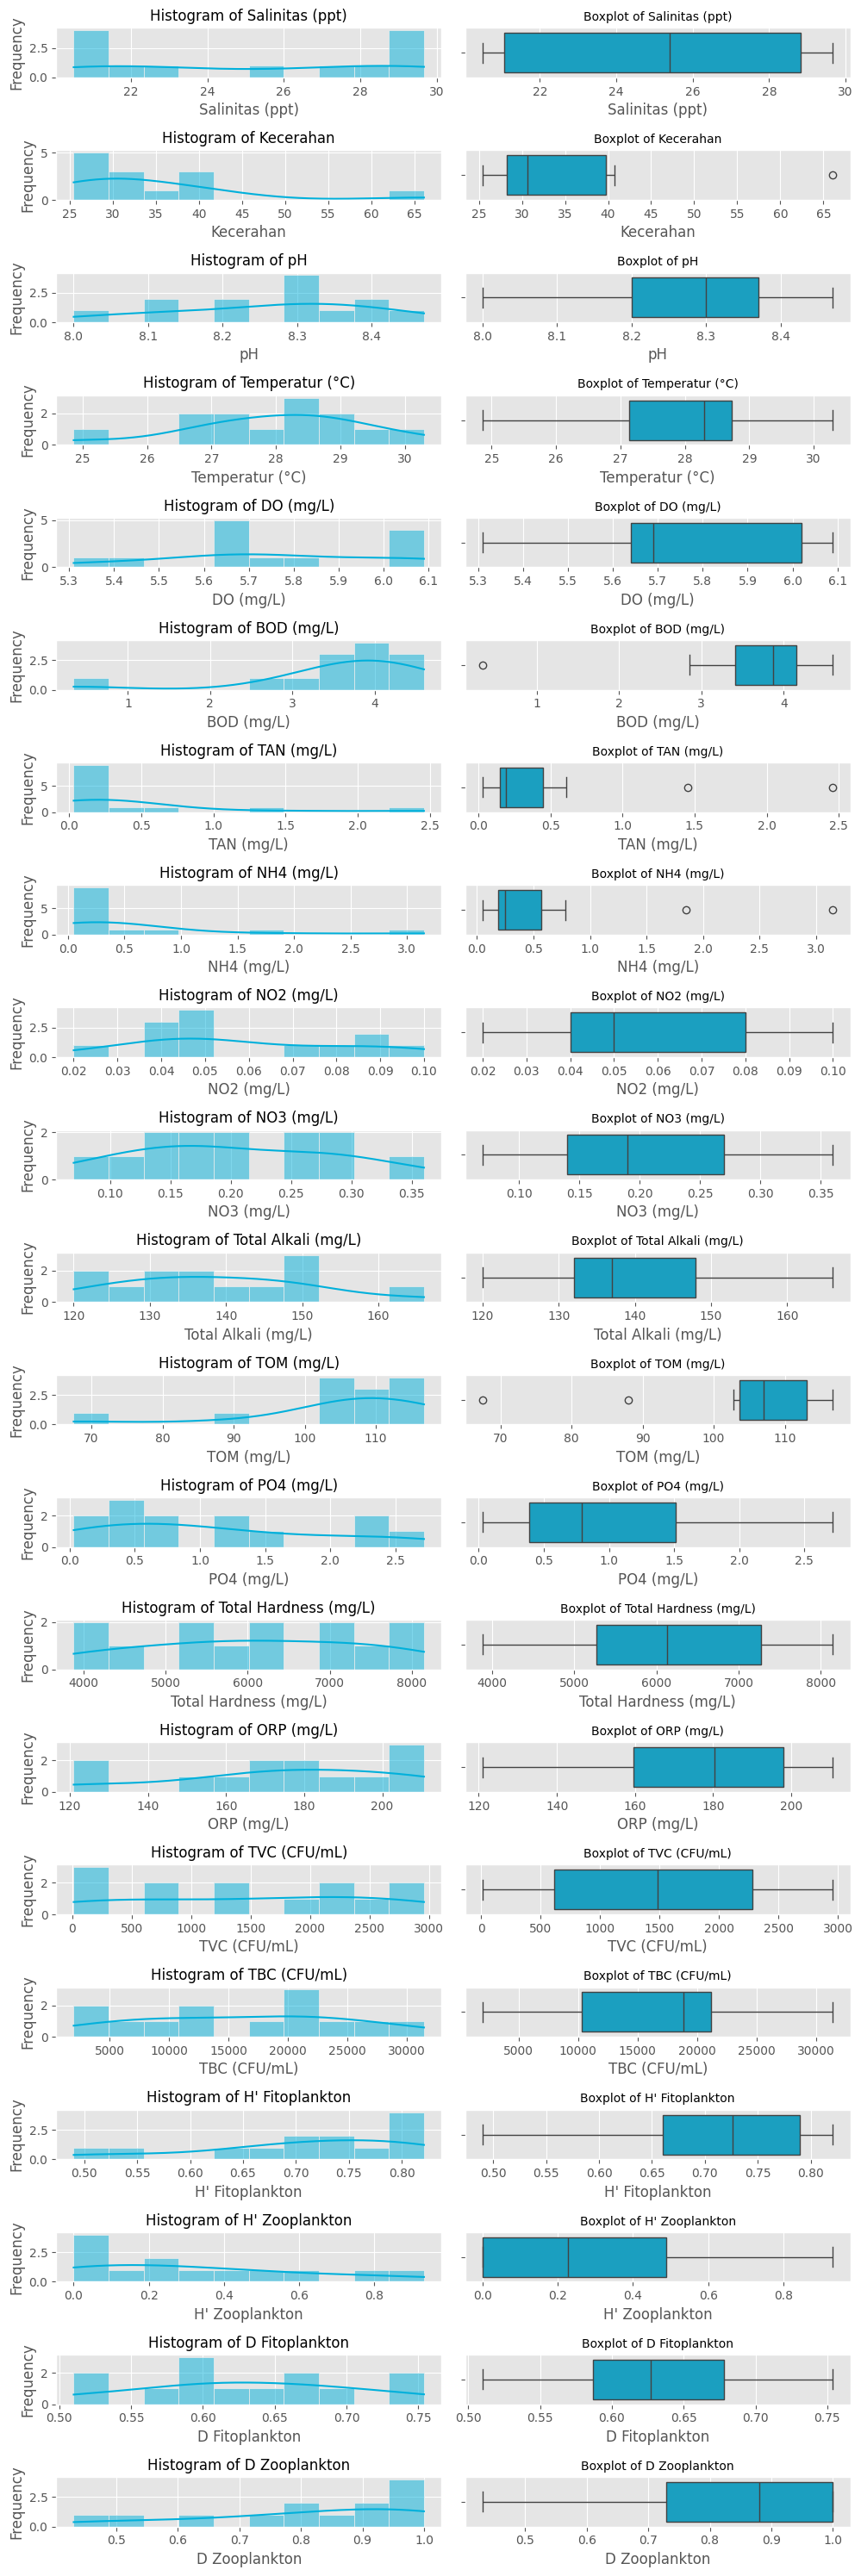

In [8]:
# Creating histogram for the numerical data
plt.figure(figsize=(10, 30))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data_all[col], kde=True, color='#00b0db', bins=10)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data_all[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()